# Importing necessary Libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
retail_df=pd.read_csv("/content/drive/MyDrive/retail_sales_dataset.csv")

In [3]:
df=retail_df.copy(deep=True)

# Data Exploration

In [4]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Data Cleaning

In [7]:
#Date column is identified as object type so we should convert to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#Dropping of duplicates if any
df.drop_duplicates(inplace=True)

In [9]:
df.shape
#There is no duplicates in the dataset

(1000, 9)

In [10]:
df['Product Category'].value_counts()
#The Product Category column have only limited categories so it is prefered Category as the data type of the column

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [11]:
#converting Product Category column data type to the Category
df['Product Category'] = df['Product Category'].astype('category')

In [12]:
df['Gender'].value_counts()
#The Gender column have only limited categories so it is prefered Category as the data type of the column

Gender
Female    510
Male      490
Name: count, dtype: int64

In [13]:
#converting Gender column data type to the Category
df['Gender'] = df['Gender'].astype('category')

In [24]:
df[(df['Age']<=0) & (df['Age']>=150)]
#The above age column does not have invalid ages.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group


In [15]:
#checking the data types of the columns
df.dtypes
#The columns have been accurately assigned their respective data types, ensuring the integrity and consistency of the dataset.

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

# Data Analysis

Cross Tabulation to express the relation between Product Category, Age Group and Gender.

In [16]:
# Group data by 'Age' and 'Gender', and calculate total amount spent
# You may need to adjust the age groupings based on your dataset and requirements
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Under 18', '18-30', '31-45', '46-60', 'Over 60'])

# Create a cross-tabulation between 'Age Group', 'Gender', and 'Product Category'
crosstab_df = pd.crosstab(index=[df['Age Group'], df['Gender']], columns=df['Product Category'])

print(crosstab_df)

Product Category  Beauty  Clothing  Electronics
Age Group Gender                               
Under 18  Female       5         3            5
          Male         4         4            0
18-30     Female      46        36           44
          Male        42        45           39
31-45     Female      45        56           55
          Male        39        57           51
46-60     Female      60        60           53
          Male        40        57           61
Over 60   Female      10        19           13
          Male        16        14           21


Gender Based Sales Analysis

In [17]:
df.groupby('Gender')['Total Amount'].mean()

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

Highly purchased product category

In [18]:
df['Product Category'].mode()
#Clothing Category hold the highest appeal among customers

0    Clothing
Name: Product Category, dtype: category
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']

Descriptive Statistics

In [19]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [20]:
df.describe(include=['object', 'category'])

,Customer ID,Gender,Product Category,Age Group
count,1000,1000,1000,1000
unique,1000,2,3,5
top,CUST001,Female,Clothing,46-60
freq,1,510,351,331


To know which Product Category makes highest average sales

In [21]:
df.groupby('Product Category')['Total Amount'].mean()

Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64

# Data Visualization

Influence on purchasing behaviour by customer Age and Gender.

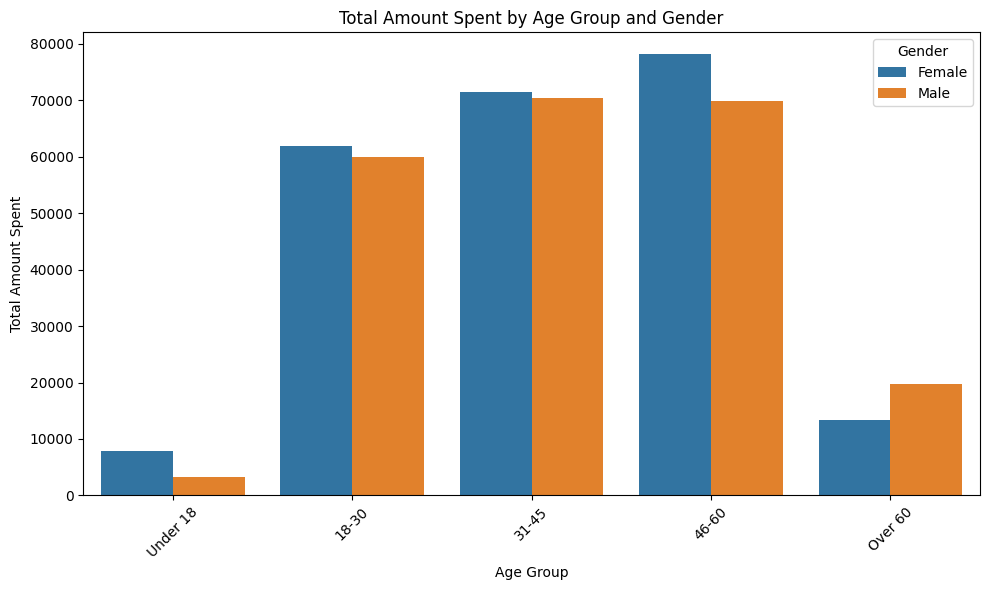

In [26]:
# Group data by 'Age' and 'Gender', and calculate total amount spent
# You may need to adjust the age groupings based on your dataset and requirements
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Under 18', '18-30', '31-45', '46-60', 'Over 60'])
age_gender_sales = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=age_gender_sales)
plt.title('Total Amount Spent by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 **Time Series Analysis**

1.Sales Over Time(Monthly):

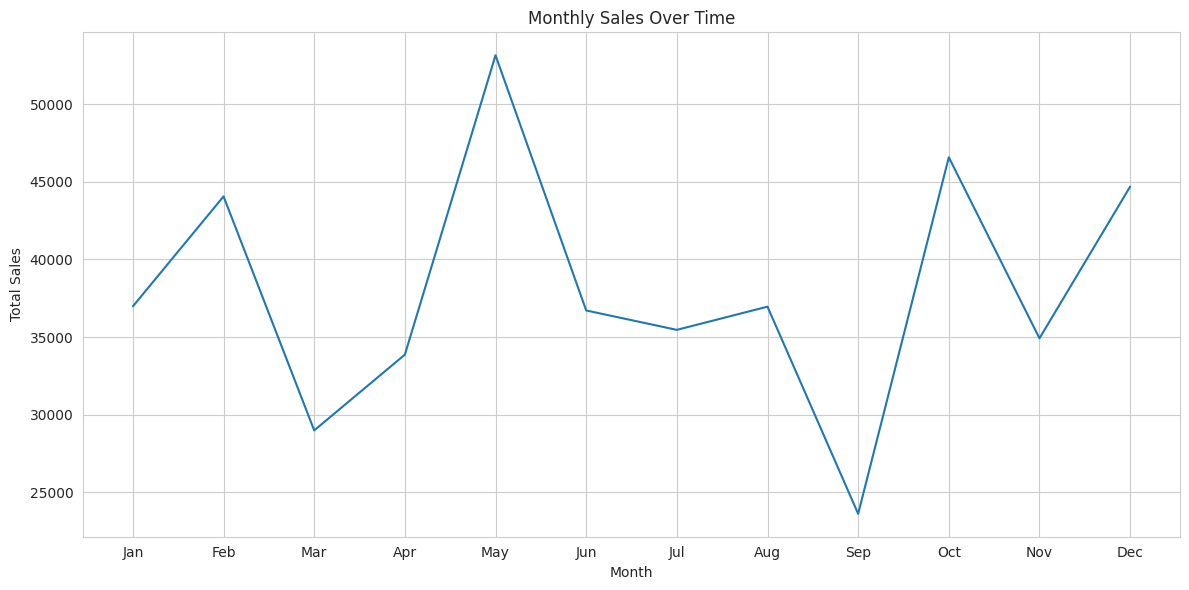

In [27]:
# Extracting year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group data by year and month, and calculate total sales
monthly_sales = df.groupby(['Month'])['Total Amount'].sum().reset_index()

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

2.Sales Over Time(quarterly):

<ipython-input-28-ebc9972cd5c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Total Amount', data=quarterly_sales, palette='viridis')


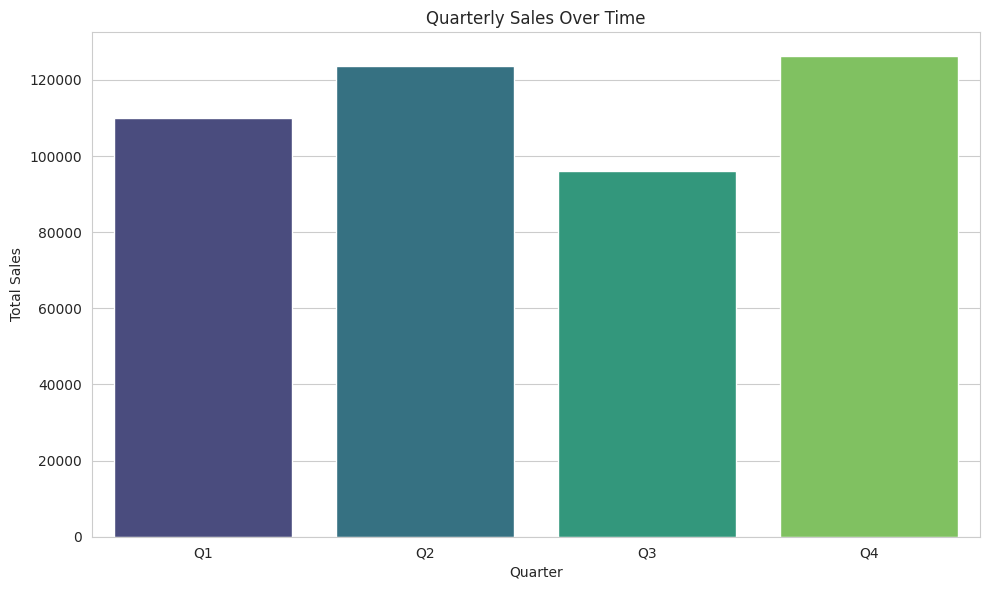

In [28]:
# Extract quarter from the 'Date' column
df['Quarter'] = df['Date'].dt.quarter

# Group data by quarter and calculate total sales
quarterly_sales = df.groupby('Quarter')['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Total Amount', data=quarterly_sales, palette='viridis')
plt.title('Quarterly Sales Over Time')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.show()

3.Contribution of the Product category to the sales over the Months

In [29]:
# Extract month number from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group data by month and product category, and calculate total sales
monthly_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().reset_index()

# Create a ribbon chart using Plotly Express
fig = px.area(monthly_sales, x="Month", y="Total Amount", color="Product Category", line_group="Product Category")

# Show the chart
fig.show()

4.Customer Growth Over Time (Monthly):

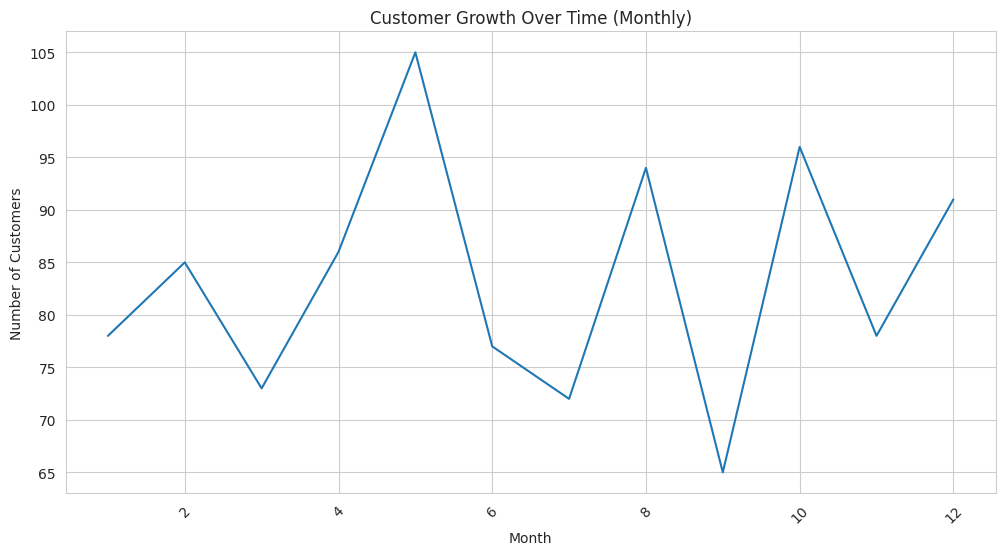

In [30]:
customer_growth_over_time_monthly = df.groupby('Month')['Customer ID'].nunique()

# Plotting customer growth over time in terms of months
customer_growth_over_time_monthly.plot(figsize=(12, 6), title='Customer Growth Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Insights

Insights drawn from dataset are:

1.The demographic segment comprising customers aged between 18 and 60 exhibits the most significant contribution to overall sales, indicating a broad appeal within this age range.

2.Both male and female customers demonstrate robust purchasing activity, with females slightly edging out males in terms of sales volume, underscoring a balanced gender representation in consumer spending.

3.The clothing product category emerges as the most prominent and sought-after segment among customers, highlighting its strong appeal and market demand.

4.Analysis of sales trends over the months reveals a notable peak in sales during the month of May, contrasting with a downturn observed in September, suggesting seasonal variations or targeted promotional activities during these periods.

5.Among the various product categories, beauty products stand out for their consistently high average sales figures, indicating strong consumer interest and sustained demand for such items.

6.Examination of the customer growth rate over time unveils a dynamic and fluctuating pattern, rather than a steady progression, underscoring the evolving nature of customer acquisition and retention strategies over different months. This variability underscores the importance of ongoing monitoring and adaptive strategies to effectively manage customer growth and engagement.




# Recommendations

1.**Targeted Marketing Campaigns**: Given the significant contribution of customers aged between 18 and 60 to overall sales, tailor marketing campaigns to resonate with this demographic segment's preferences and interests. Utilize targeted messaging and promotional offers to appeal to their specific needs and preferences.

2.**Gender-Specific Marketing Strategies**: While both male and female customers demonstrate strong purchasing activity, consider refining marketing strategies to further capitalize on the slightly higher sales from female customers. Develop gender-specific promotions or product offerings to cater to the diverse needs of each gender segment.

3.**Focus on Clothing Products**: Since clothing emerges as the most popular product category among customers, allocate resources and marketing efforts towards enhancing the visibility and appeal of clothing items. Introduce new collections, collaborate with influencers, or offer personalized shopping experiences to drive sales within this category.

4.**Seasonal Marketing Tactics**: Capitalize on the observed sales peaks in May by launching targeted seasonal promotions or special offers to maximize sales during this period. Additionally, implement strategies to mitigate the sales downturn observed in September, such as introducing limited-time promotions or incentivizing repeat purchases.

4.**Optimization of Beauty Product Offerings**: Recognizing the consistent high average sales figures for beauty products, invest in expanding and diversifying the range of beauty products offered. Partner with popular beauty brands, conduct customer surveys to identify emerging trends, and ensure optimal product availability to meet consumer demand.

5.**Dynamic Customer Engagement Strategies**: Acknowledging the fluctuating nature of the customer growth rate over time, implement dynamic and adaptive customer engagement strategies. Utilize data-driven insights to identify customer preferences and behavior patterns, personalize communication channels, and foster long-term customer relationships through targeted engagement initiatives.

By implementing these recommendations, businesses can leverage the insights gained from the dataset to optimize marketing efforts, enhance product offerings, and effectively engage with customers to drive sustained growth and profitability.